In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from env2 import env
from DQNCore import DQNCore

In [2]:
init_state = env.get_initial_state()
action_space = env.get_action_space()
agent = DQNCore(init_state, len(action_space))

In [3]:
MAX_EPISODE = 10

global_counter = 0
varepsilon = 0

for episode in range(MAX_EPISODE):
    print (episode)
    step_counter = 0
    env.reset()
    state = env.get_initial_state()
    agent.init()
    while True:
        global_counter += 1
        step_counter += 1
        if global_counter % 1000 == 0:
            varepsilon += 5e-5
        
        action = agent.varepsilon_greedy_policy(state, varepsilon)
        reward, next_state, done = env.step(action)
        agent.update_cache(state, action, reward, next_state, done)
        state = next_state
        
        if global_counter > 1000 and step_counter > 32:
            agent.step_learning()
        if global_counter % 1000 ==0:
            agent.update_nextQ_network()     
        
        if done:
            break

0
1
2
3
4
5
6
7
8
9


In [4]:
reward_list= []
value_list = []
env.reset()
state = env.get_initial_state()
for i in range(600):
    action = agent.greedy_policy(state)
    reward, next_state, done = env.step(action)
    state = next_state
    reward_list.append(reward)
    value_list.append(env.total_value)

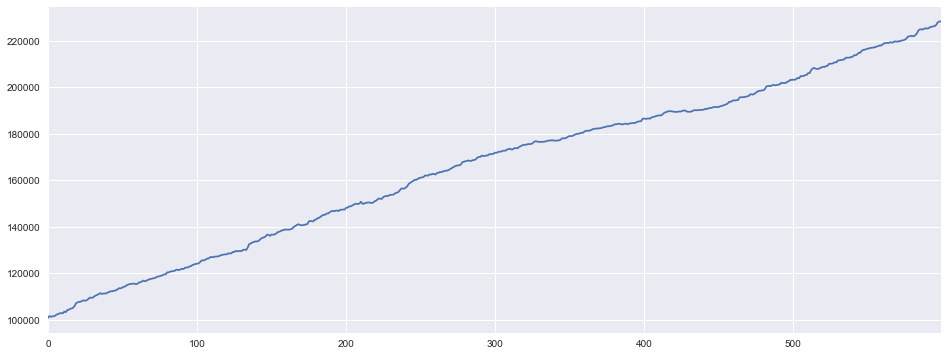

In [5]:
pd.Series(value_list).plot(figsize=(16,6))